In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
gdp_df = pd.read_csv("../data/gdp_percapita.csv.csv", nrows=6868)

In [4]:
internet_df = pd.read_csv("../data/internet_use.csv.csv", nrows = 4494)

7. Look at the shape of each DataFrame - how many rows? How many columns

In [5]:
row_count = len(gdp_df)
column_count = gdp_df.shape
row_row = len(internet_df)
col_umn = internet_df.shape
print("info for gdp")
print( row_count)
print(column_count)
print("info for internet")
print(row_row)
print(col_umn)

info for gdp
6868
(6868, 4)
info for internet
4494
(4494, 4)


8. Take a look at the datatypes for the columns in each DataFrame.

In [6]:
#first run a test to see what the columns are actually called. 
#print(gdp_df)
#print(internet_df)
#then use a hashtag to comment out the print() and type the columns
gdp_df.columns = [c.replace(' ', '_') for c in gdp_df.columns]
internet_df.columns = [c.replace(' ', '_') for c in internet_df.columns]
print(gdp_df.head(1))
print(internet_df.head(1))
type(gdp_df.Country_or_Area)
type(gdp_df.Year)
type(gdp_df.Value)

type(internet_df.Country_or_Area)
type(internet_df.Year)
type(internet_df.Value)

  Country_or_Area  Year        Value  Value_Footnotes
0     Afghanistan  2019  2065.036398              NaN
  Country_or_Area  Year  Value  Value_Footnotes
0     Afghanistan  2014   6.39              NaN


pandas.core.series.Series

9. Take a look at the last 10 rows of each DataFrame in turn.

In [7]:
gdp_df.tail(10) #start at the head or start at the tail?
internet_df.tail(10)

,Country_or_Area,Year,Value,Value_Footnotes
4484,Zimbabwe,2003,6.394786,NaN
4485,Zimbabwe,2002,3.994356,NaN
4486,Zimbabwe,2001,0.799846,NaN
4487,Zimbabwe,2000,0.401434,NaN
4488,Zimbabwe,1999,0.161676,NaN
4489,Zimbabwe,1998,0.081648,NaN
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN


10. Drop the value footnotes column from both DataFrames. Check that this worked as expected.

In [8]:
del gdp_df['Value_Footnotes']
gdp_df.head(10)
#had a bit of difficulty with this one as I initially attempted gdp_df.pop() and gdp_df.drop(['Value_Footnotes'])
del internet_df['Value_Footnotes']
internet_df.head(3)
#it's easier to comment out one group rathe than run two

,Country_or_Area,Year,Value
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545


11. Change the columns for the GDP Per Capita DataFrame to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.

In [9]:
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']
print(gdp_df)

          Country  Year  GDP_Per_Capita
0     Afghanistan  2019     2065.036398
1     Afghanistan  2018     2033.779002
2     Afghanistan  2017     2058.383832
3     Afghanistan  2016     2057.062164
4     Afghanistan  2015     2068.265904
...           ...   ...             ...
6863     Zimbabwe  1994     3263.934978
6864     Zimbabwe  1993     3033.504852
6865     Zimbabwe  1992     3054.889178
6866     Zimbabwe  1991     3426.598094
6867     Zimbabwe  1990     3324.348171

[6868 rows x 3 columns]


12. Change the columns for the Internet Users DataFrame to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.

In [10]:
internet_df.columns = ['Country', 'Year', 'Internet_Users_Pct']
print(internet_df)

          Country  Year  Internet_Users_Pct
0     Afghanistan  2014            6.390000
1     Afghanistan  2013            5.900000
2     Afghanistan  2012            5.454545
3     Afghanistan  2011            5.000000
4     Afghanistan  2010            4.000000
...           ...   ...                 ...
4489     Zimbabwe  1998            0.081648
4490     Zimbabwe  1997            0.033080
4491     Zimbabwe  1996            0.016790
4492     Zimbabwe  1995            0.007684
4493     Zimbabwe  1994            0.001739

[4494 rows x 3 columns]


13. Merge the two DataFrames to one. Merge all rows from each of the two DataFrames. Call the new DataFrame gdp_and_internet_use.

In [11]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, how = "outer", on = ['Country', 'Year'])

gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN


14. Look at the first five rows of your new DataFrame to confirm it merged correctly

In [12]:
#way ahead of ya there, chief.

15. Look at the last five rows to make sure the data is clean and as expected.

In [13]:
gdp_and_internet_use.tail()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7900,Yemen,1999,NaN,0.056629
7901,Yemen,1998,NaN,0.023323
7902,Yemen,1997,NaN,0.015025
7903,Yemen,1996,NaN,0.000621
7904,Yemen,1990,NaN,0.000000


16. Subset the combined DataFrame to keep only the data for 2004, 2009, and 2014. Check that this happened correctly.

In [14]:
filter_list = [2004, 2009, 2014]
gdp_and_internet_use[gdp_and_internet_use.Year.isin(filter_list)]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
5,Afghanistan,2014,2102.385234,6.390000
10,Afghanistan,2009,1758.904043,3.550000
15,Afghanistan,2004,1200.278256,0.105809
23,Albania,2014,11623.866679,60.100000
28,Albania,2009,10346.864199,41.200000
...,...,...,...,...
7868,Virgin Islands (U.S.),2009,NaN,27.396510
7873,Virgin Islands (U.S.),2004,NaN,27.377009
7885,Yemen,2014,NaN,22.550000
7890,Yemen,2009,NaN,9.960000


17. Create three new DataFrames, one for 2004, one for 2009, and one for 2014. Give them meaningful names that aren't too long.

In [15]:
f04= [2004]
f09= [2009]
f14= [2014]
gdpi_04 = gdp_and_internet_use[gdp_and_internet_use.Year.isin(f04)]
gdpi_09 = gdp_and_internet_use[gdp_and_internet_use.Year.isin(f09)]
gdpi_14 = gdp_and_internet_use[gdp_and_internet_use.Year.isin(f14)]
print(gdpi_04)
print(gdpi_09)
print(gdpi_14)

                    Country  Year  GDP_Per_Capita  Internet_Users_Pct
15              Afghanistan  2004     1200.278256            0.105809
33                  Albania  2004     7604.838002            2.420388
63                  Algeria  2004    10058.435939            4.634475
93                   Angola  2004     5593.241537            0.464815
123     Antigua and Barbuda  2004    18745.681534           24.266544
...                     ...   ...             ...                 ...
7771     T.F.Y.R. Macedonia  2004             NaN           24.440000
7829              Venezuela  2004             NaN            8.404470
7853               Viet Nam  2004             NaN            7.642409
7873  Virgin Islands (U.S.)  2004             NaN           27.377009
7895                  Yemen  2004             NaN            0.881223

[276 rows x 4 columns]
                    Country  Year  GDP_Per_Capita  Internet_Users_Pct
10              Afghanistan  2009     1758.904043             3.55

In [16]:
# Let's retry that one, make it cleaner.
# if gdp_and_internet_use.Year == 2004:
#     print(gdp_and_internet_use as gdpi_04)
# elif gdp_and_internet_use.Year == 2009:
#     print(gdp_and_internet_use as gdpi_09)
# elif gdp_and_internet_use.Year == 2014:
#     print(gdp_and_internet_use as gdpi_14)
# else:
#     end --Clearly that was nonsense and did not work. We will come back to this.



18. Which country had the highest percentage of internet users in 2014? What was the percentage? (Try typing the first 3 letters of your DataFrame name and hitting the tab key for auto-complete options).

In [17]:
no_NaNsense = gdpi_14.sort_values(by= 'Internet_Users_Pct', ascending=False)
print(no_NaNsense)

# Way to go Iceland! 98.16% is not too shabby.

                  Country  Year  GDP_Per_Capita  Internet_Users_Pct
2625              Iceland  2014    49652.149500               98.16
561               Bermuda  2014    77361.104881               96.80
4648               Norway  2014    62589.373548               96.30
1452              Denmark  2014    52214.537753               95.99
6871              Andorra  2014             NaN               95.90
...                   ...   ...             ...                 ...
6427               Tuvalu  2014     3450.793169                 NaN
6607  Upper middle income  2014    14275.343977                 NaN
6727              Vietnam  2014     6098.489609                 NaN
6757   West Bank and Gaza  2014     5967.073437                 NaN
6783                World  2014    15189.648507                 NaN

[277 rows x 4 columns]


19. Which country had the lowest percentage of internet users in 2014? What was the percentage?

In [18]:
#This question seems easy enough, just flip the previous code to be ascending= true
gdpi_14.sort_values(by= 'Internet_Users_Pct', ascending=True)
#And we get Timor-Leste with 1.14%. It looks like a small half-island country just above Australia

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7079,Dem. People's Rep. of Korea,2014,NaN,0.00
7137,Eritrea,2014,NaN,0.99
6219,Timor-Leste,2014,3264.568070,1.14
827,Burundi,2014,886.235777,1.38
7674,Somalia,2014,NaN,1.63
...,...,...,...,...
6427,Tuvalu,2014,3450.793169,NaN
6607,Upper middle income,2014,14275.343977,NaN
6727,Vietnam,2014,6098.489609,NaN
6757,West Bank and Gaza,2014,5967.073437,NaN


20. Repeat for 2004 and 2009

In [19]:
int_high04 = gdpi_04.sort_values(by= 'Internet_Users_Pct', ascending=False)
int_high09 = gdpi_09.sort_values(by= 'Internet_Users_Pct', ascending=False)
print(int_high04.head(2)) 
print(int_high09.head(2))
# I initially tried just df.tail but was getting NaN returns. We can't combine .dropna & .tail, so let's prefunction it.
# int_high04.dropna()
# int_high09.dropna()
# print(int_high04.tail(2)) 

# print(int_high09.tail(2)) --Not working so far, still getting NaNs so let's go the long way.
int_low04 = gdpi_04.sort_values(by= 'Internet_Users_Pct', ascending=True)
int_low09 = gdpi_09.sort_values(by= 'Internet_Users_Pct', ascending=True)

print(int_low04.head(2))
print(int_low09.head(2))

      Country  Year  GDP_Per_Capita  Internet_Users_Pct
6019   Sweden  2004    44496.023401               83.89
2635  Iceland  2004    45145.545658               83.88
      Country  Year  GDP_Per_Capita  Internet_Users_Pct
2630  Iceland  2009    48177.084123               93.00
4653   Norway  2009    61886.564498               92.08
                          Country  Year  GDP_Per_Capita  Internet_Users_Pct
7088  Dem. People's Rep. of Korea  2004             NaN            0.000000
4342                      Myanmar  2004      1696.88176            0.024337
                          Country  Year  GDP_Per_Capita  Internet_Users_Pct
7083  Dem. People's Rep. of Korea  2009             NaN            0.000000
6224                  Timor-Leste  2009     2724.770973            0.185252


In [20]:
#That's a hodgepodge of dirty code, so here's what we found out: In 2004 Sweden was the highest by .01% with a total of 83.89%
#Myanmar was the lowest in 2004 with 0.024%
# In 2009 Iceland pulled ahead with an even 93% but Myanmar climbed out of last place, leaving Timor-Leste with 0.185%

21. Which country had the highest gdp per capita in 2014? What was the gdp per capita?

In [21]:
hi_cap14 = gdpi_04.sort_values(by= 'GDP_Per_Capita', ascending=False)
print(hi_cap14)
#Luxembourg, you little rascal. How'd you get 102708.212

                    Country  Year  GDP_Per_Capita  Internet_Users_Pct
3701             Luxembourg  2004   102708.212547           65.880000
6527   United Arab Emirates  2004    97758.023345           30.131296
5148                  Qatar  2004    93748.301216           20.701648
571                 Bermuda  2004    90195.811033           60.990867
5306             San Marino  2004    80391.828516           50.566343
...                     ...   ...             ...                 ...
7771     T.F.Y.R. Macedonia  2004             NaN           24.440000
7829              Venezuela  2004             NaN            8.404470
7853               Viet Nam  2004             NaN            7.642409
7873  Virgin Islands (U.S.)  2004             NaN           27.377009
7895                  Yemen  2004             NaN            0.881223

[276 rows x 4 columns]


22. Which country had the lowest gdp per capita in 2014? What was the gdp per capita?

In [22]:
print(hi_cap14.tail)
#Democratic Republic of Congo at 757.68

<bound method NDFrame.tail of                     Country  Year  GDP_Per_Capita  Internet_Users_Pct
3701             Luxembourg  2004   102708.212547           65.880000
6527   United Arab Emirates  2004    97758.023345           30.131296
5148                  Qatar  2004    93748.301216           20.701648
571                 Bermuda  2004    90195.811033           60.990867
5306             San Marino  2004    80391.828516           50.566343
...                     ...   ...             ...                 ...
7771     T.F.Y.R. Macedonia  2004             NaN           24.440000
7829              Venezuela  2004             NaN            8.404470
7853               Viet Nam  2004             NaN            7.642409
7873  Virgin Islands (U.S.)  2004             NaN           27.377009
7895                  Yemen  2004             NaN            0.881223

[276 rows x 4 columns]>


23. Create some scatterplots:
a. 2004 Percent Using the Internet vs GDP Per Capita
b. 2009 Percent Using the Internet vs GDP Per Capita
c. 2014 Percent Using the Internet vs GDP Per Capita

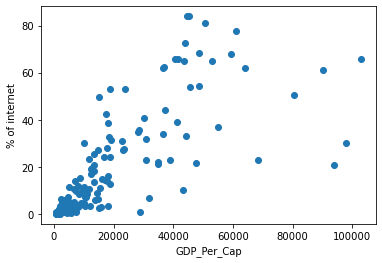

In [51]:
# Plot for 04
plt.scatter(gdpi_04.GDP_Per_Capita, gdpi_04.Internet_Users_Pct)
plt.xlabel('GDP_Per_Cap')
plt.ylabel('% of internet')
plt.show()

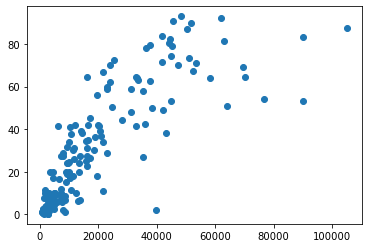

In [24]:
#Plot for 09
plt.scatter(gdpi_09.GDP_Per_Capita, gdpi_09.Internet_Users_Pct)
plt.show()

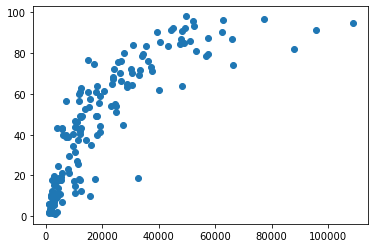

In [25]:
#Plot for 14
plt.scatter(gdpi_14.GDP_Per_Capita, gdpi_14.Internet_Users_Pct)
plt.show()

24. Are there differences across years? What do the plots tell you about any relationship between these two variables? Enter your observations as a markdown cell.

In [26]:
#Typically those with more internet usage have higher GDPs. 
#This is true as the world becomes more technologically dependent on the internet with years.
#It also shows a cluster, that there will always be more on the lower end than the higher end. 

25. Look at the distribution of gdp per capita values for 2014. Is it unimodal?

array([[<AxesSubplot:title={'center':'GDP_Per_Capita'}>]], dtype=object)

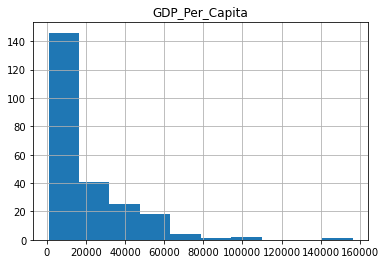

In [27]:

#plt.bar(gdpi_14.Country, gdpi_14.GDP_Per_Capita)
#plt.show()
gdpi_14.hist('GDP_Per_Capita', bins=10)
#it seems very limited in scope so yes, it is unimodal

26. Look at the distribution of Internet Use for 2014. Is it unimodal?

array([[<AxesSubplot:title={'center':'Internet_Users_Pct'}>]],
      dtype=object)

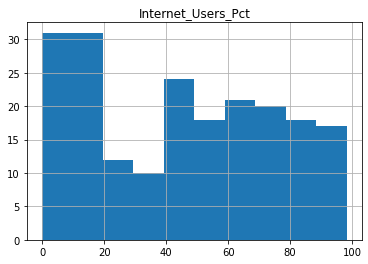

In [28]:
gdpi_14.hist('Internet_Users_Pct', bins=10)
#This one is not unimodel. There are many countries with under 20% using internet.
#There is also many more pm their way towards standardization with over 40%

27. What are the top 5 countries in terms of internet use in 2014?

In [29]:
an_27 = gdpi_14.sort_values(by= 'Internet_Users_Pct', ascending=False).head()
an_27
#I feel like Luxembourg is so small it's off because of total population configured into a percent. 

#gdpi_14.nlargest(5, ['Internet_Users_Pct']) Caitlyn Brown came up with this one. 

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2625,Iceland,2014,49652.149500,98.16
561,Bermuda,2014,77361.104881,96.80
4648,Norway,2014,62589.373548,96.30
1452,Denmark,2014,52214.537753,95.99
6871,Andorra,2014,NaN,95.90


28. Create a DataFrame called top_5_internet from the combined DataFrame that has all three years for the 5 countries that had the greatest 2014 internet usage. You should have 15 rows. Check that this is true.



In [30]:
#{'Country':['Iceland', 'Bermuda', 'Norway', 'Denmark', 'Luxembourg']}
# target_year = gdp_and_internet_use({'Year':[2004, 2009, 2014]})
# df_target['Internet_Users_Pct'] --This wasn't working

#filter1 = gdpi_04.head() 
#top_5_internet = [gdpi_04.where(filter, inplace = True)], gdpi_09.where(filter, inplace = True), an_27]
#print(gdpi_04.where(filter, inplace = True))

#print(gdpi_09('Country':['Iceland', 'Bermuda', 'Norway', 'Denmark', 'Luxembourg']))
#^^^ none of that worked, so lets try something new

In [36]:
dataframes = [gdpi_04,gdpi_09, gdpi_14]
gdpi4_14 = pd.concat(dataframes)

#print(gdp_and_internet_use)
top_5_internet = gdpi4_14[gdpi4_14['Country'].isin(['Iceland', 'Bermuda', 'Norway', 'Denmark', 'Andorra'])]
print(top_5_internet)

      Country  Year  GDP_Per_Capita  Internet_Users_Pct
571   Bermuda  2004    90195.811033           60.990867
1462  Denmark  2004    50607.628971           80.930000
2635  Iceland  2004    45145.545658           83.880000
4658   Norway  2004    60893.410993           77.690000
6881  Andorra  2004             NaN           26.837954
566   Bermuda  2009    89961.982744           83.250000
1457  Denmark  2009    50274.075696           86.840000
2630  Iceland  2009    48177.084123           93.000000
4653   Norway  2009    61886.564498           92.080000
6876  Andorra  2009             NaN           78.530000
561   Bermuda  2014    77361.104881           96.800000
1452  Denmark  2014    52214.537753           95.990000
2625  Iceland  2014    49652.149500           98.160000
4648   Norway  2014    62589.373548           96.300000
6871  Andorra  2014             NaN           95.900000


29.Create a seaborn FacetGrid to show the internet usage trend across the years 2004, 2009, and 2014 for these 5 countries (those with the highest reported internet use in 2014). Which country had the greatest growth between 2004 and 2014?

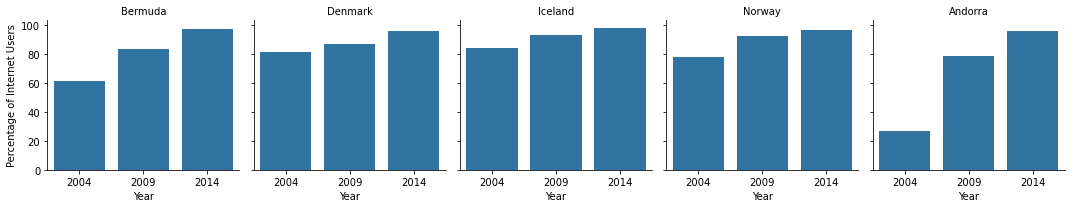

In [37]:
g = sns.FacetGrid(top_5_internet, col='Country', palette='bright')
g.map_dataframe(sns.barplot, x='Year', y='Internet_Users_Pct')
g.set_axis_labels('Year', 'Percentage of Internet Users')
g.set_titles(col_template='{col_name}')
#Andorra had the most growth

30.Repeat the steps above to look at the trend for the 5 countries with the lowest 2014 internet usage. Which country has consistently had the least internet use?

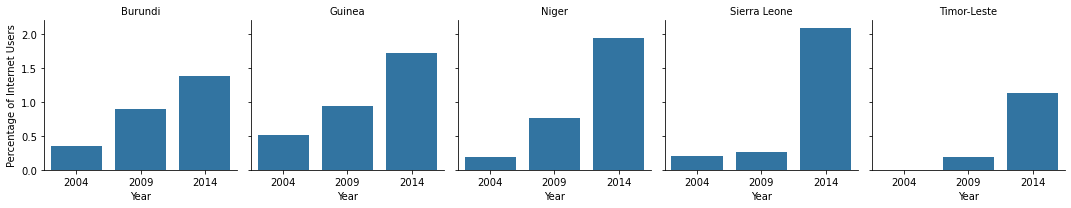

In [38]:
#gdpi_14.sort_values(by= 'Internet_Users_Pct', ascending=True).head()
bot_5_internet= gdpi4_14[gdpi4_14['Country'].isin(['Timor-Leste', 'Burundi', 'Guinea', 'Niger', 'Sierra Leone'])]
g = sns.FacetGrid(bot_5_internet, col='Country', palette='bright')
g.map_dataframe(sns.barplot, x='Year', y='Internet_Users_Pct')
g.set_axis_labels('Year', 'Percentage of Internet Users')
g.set_titles(col_template='{col_name}')

#at least everybody is slowly improving, even if the rate of improvement is not the same.

31.Find the top 5 countries for 2014 in terms of GDP per capita; create a DataFrame to look at 10-year trends (use 2004, 2009, 2014 to look at the 10-year trend) in gdp per capita for the 5 countries with the highest 2014 GDP per capita. Use a seaborn facet grid for this.

               Country  Year  GDP_Per_Capita  Internet_Users_Pct
3721  Macao SAR, China  2014   156514.133850                 NaN
3691        Luxembourg  2014   108760.916030               94.67
5138             Qatar  2014    95578.416973               91.49
5464         Singapore  2014    87808.663157               82.00
561            Bermuda  2014    77361.104881               96.80


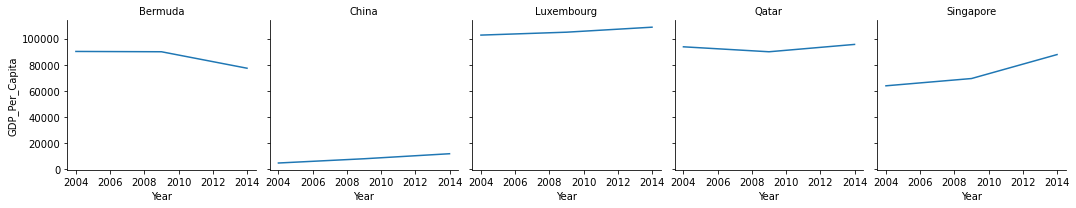

In [39]:
print(gdpi_14.sort_values(by= 'GDP_Per_Capita', ascending=False).head(5))
#had to find out what I need to be looking at
gdp_trends = gdpi4_14[gdpi4_14['Country'].isin(['China', 'Luxembourg', 'Qatar', 'Singapore', 'Bermuda'])]
g = sns.FacetGrid(gdp_trends, col='Country')
g.map_dataframe(sns.lineplot, x='Year', y='GDP_Per_Capita')
g.set_axis_labels('Year', 'GDP_Per_Capita')
g.set_titles(col_template='{col_name}')
#Forget how you did this? https://www.youtube.com/watch?v=YYeqJllXHxM

32. Repeat this one more time to look at 10-year trend for the 5 countries for 2014 with the lowest GDP per capita.

                       Country  Year  GDP_Per_Capita  Internet_Users_Pct
1047  Central African Republic  2014      822.610458                 NaN
827                    Burundi  2014      886.235777                1.38
3781                    Malawi  2014     1027.208496                5.83
1422           Dem. Rep. Congo  2014     1029.790785                 NaN
4528                     Niger  2014     1127.615541                1.95


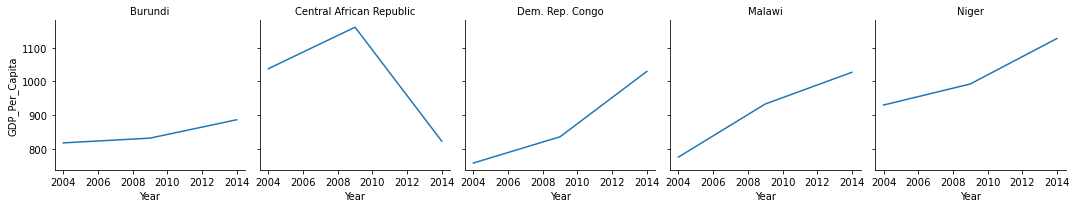

In [49]:
print(gdpi_14.sort_values(by= 'GDP_Per_Capita', ascending=True).head(5))

#had to find out what I need to be looking at
gdp_trends = gdpi4_14[gdpi4_14['Country'].isin(['Niger', 'Dem. Rep. Congo', 'Malawi', 'Central African Republic', 'Burundi'])]
g = sns.FacetGrid(gdp_trends, col='Country')
g.map_dataframe(sns.lineplot, x='Year', y='GDP_Per_Capita')
g.set_axis_labels('Year', 'GDP_Per_Capita')
g.set_titles(col_template='{col_name}')

33. Is there anything surprising or unusual in any of these plots? Searching on the internet, can you find any possible explanations for unusual findings?

It's not surprising that the world is moving in a general technologically advancing trend. The quality of life tends to improve over each generation, so we will gradually work towards everybody having access to internet. GDP wise though...I was surprised to find that smaller countries had higher changes, but that makes sense with less people having more volatile data. China has more people working, so even if they have growth it will be more gradual. 
In 2009 or 2010 Central African Republic just took a nose dive.

In [ ]:
#https://datahelpdesk.worldbank.org/knowledgebase/articles/191133-why-are-some-data-not-available